In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

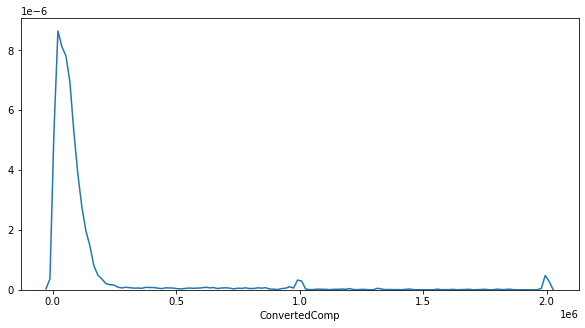

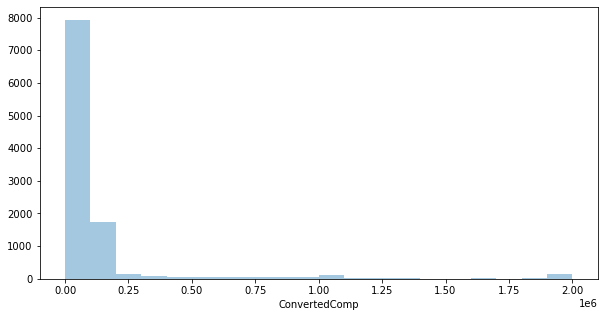

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [2]:
  #Plot the distribution curve for the column ConvertedComp
  plt.figure(figsize=(10,5))
  sns.distplot(a=df["ConvertedComp"],bins=20,hist=False)
  plt.show()
  #Plot the histogram for the column ConvertedComp
  plt.figure(figsize=(10,5))
  sns.distplot(a=df["ConvertedComp"],bins=20,kde=False)
  plt.show()
  #the median of the column ConvertedComp
  df["ConvertedComp"].median()
  #number of responders identified themselves only as a Man
  df["Gender"].value_counts()
  #the median number of ConvertedComp of responders identified themselves only as a Woman
  woman = df[df["Gender"] == "Woman"]
  woman["ConvertedComp"].median()
  #five number summary for the column Age
  df["Age"].describe()

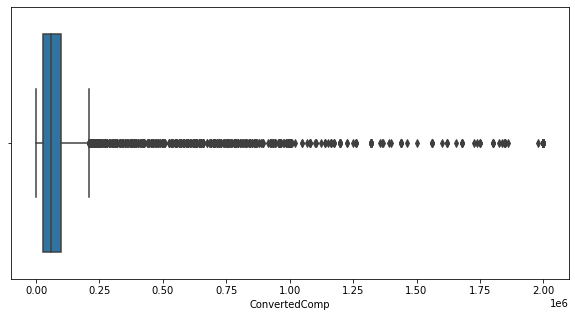

73132.0


59883.20838915799

In [3]:
#Find out if outliers exist in the column ConvertedComp using a box plot
plt.figure(figsize=(10,5))
sns.boxplot(x=df.ConvertedComp, data=df)
plt.show()
#Find out the Inter Quartile Range for the column ConvertedComp
df["ConvertedComp"].describe()
#Find out the upper and lower bounds.
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#Identify how many outliers are there in the ConvertedComp column
outliers = (df["ConvertedComp"] < (Q1 - 1.5 * IQR)) | (df["ConvertedComp"] > (Q3 + 1.5 * IQR))
outliers.value_counts()
less = (df["ConvertedComp"] < (Q1 - 1.5 * IQR))
less.value_counts()
more = (df["ConvertedComp"] > (Q3 + 1.5 * IQR))
more.value_counts()
#Create a new dataframe by removing the outliers from the ConvertedComp column
RemoveConvertedcomp = df[~(df["ConvertedComp"] > (Q3 + 1.5 * IQR))]
RemoveConvertedcomp.head()
RemoveConvertedcomp["ConvertedComp"].median()
RemoveConvertedcomp["ConvertedComp"].mean()

In [4]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
import sqlite3
import pandas as pd
# open a database connection
conn = sqlite3.connect("m4_survey_data.sqlite") 
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)
#run a group by query
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)
#Describe a table
table_name = 'master'  # the table you wish to describe
QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)
df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

--2022-03-10 20:24:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  29.7MB/s    in 1.2s    

2022-03-10 20:24:28 (29.7 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "Undergra